# Color Segmentation

We are going to learn how to perform color segmentation with the help of the OpenCV function **`inRange()`**.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["image.cmap"] = "gray"

## 1. Read and Display a Color Image

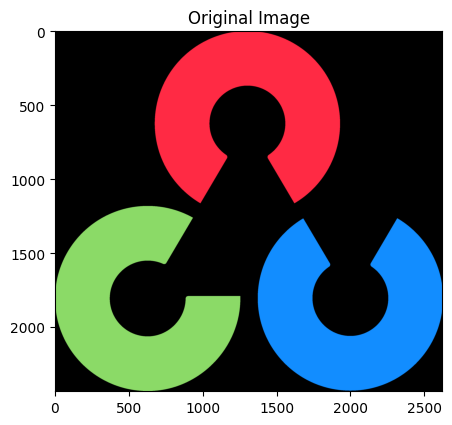

In [2]:
# Read the image in a3 channel color format.
img = cv2.imread("../module03/opencv_logo.png", cv2.IMREAD_COLOR)

# Display.
plt.figure(figsize=(5, 5))
plt.imshow(img[:, :, ::-1])
plt.title("Original Image");

## 2. Convert the image to HSV

Similar to the RGB color space, HSV contains three channels. However, instead of these channels representing how much Blue, Green, and Red contribute to a single pixel, HSV instead defines the color of a single pixels stands in terms of Hue, Saturation, and Value. Both RGB and HSV take up the same number of channels, so we can convert from one to the other with minimal impact to our image (small rounding errors may take effect).

In [3]:
# The output is a 8-bit 3-channel image, exactly the same as we had before but now is in the HSV color space.
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

You can image RGB as a sort of color box or being represented as a cube in 3D space, then HSV is more like a cylinder. Instead of your individual axes of color of BGR representing how much any contributes to a single pixel color, instead we are splitting out into the hue, saturation and value components.

+ Value: Represents how dark or light an image, pure black would have a value of zero, pure white would have a value of 255.

+ Saturation: Defines how much color is being contributed to a given pixel.

+ Hue: Defines the cylinder's perimeter (it's like the color we want to use)

The main benefit this gives us is it allows us to very distinctly define what the color meaning the hue in terms of it being red, or green or yellow in a single channel as opposed to it being split based on the combination of the BGR components for a given pixel.

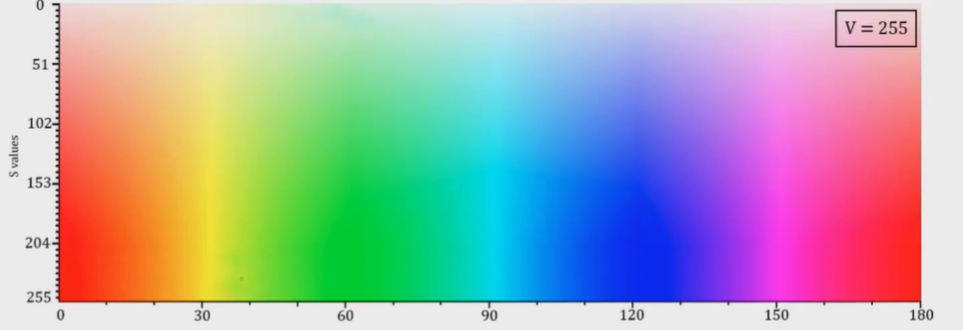

In [4]:
# Segment out our image by isolating the ranges of hue values
# Set range for red color.
r_lb = np.array([165, 50, 50], np.uint8)
r_ub = np.array([180, 255, 255], np.uint8)

# Set ranges for green color.
g_lb = np.array([35, 50, 50], np.uint8)
g_ub = np.array([80, 255, 255], np.uint8)

# Set ranges for blue color.
b_lb = np.array([95, 50, 50], np.uint8)
b_ub = np.array([125, 255, 255], np.uint8)

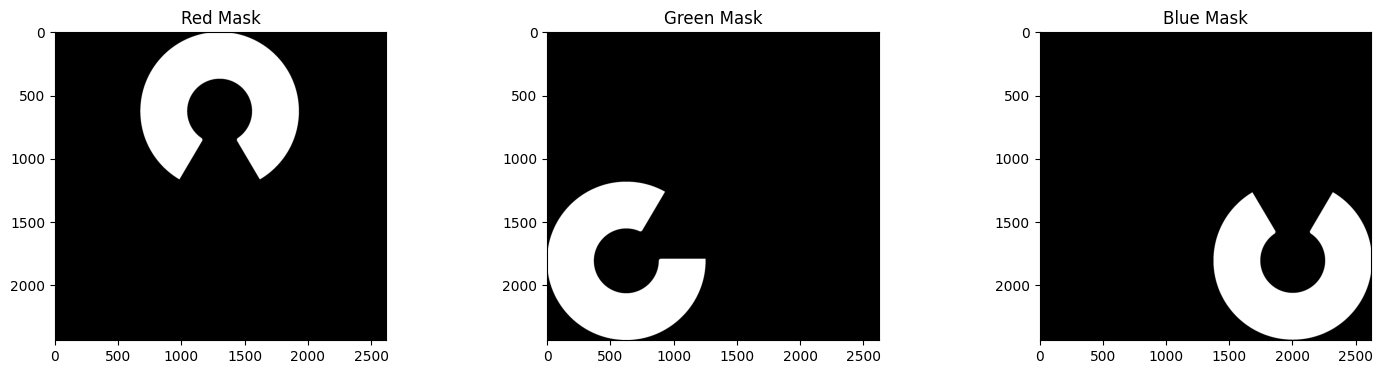

In [5]:
# Define each color mask.
r_mask = cv2.inRange(img_hsv, r_lb, r_ub)
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)
b_mask = cv2.inRange(img_hsv, b_lb, b_ub)

# Display each color mask.
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(r_mask); plt.title("Red Mask")
plt.subplot(132); plt.imshow(g_mask); plt.title("Green Mask")
plt.subplot(133); plt.imshow(b_mask); plt.title("Blue Mask");

In [11]:
r_mask.shape

(2436, 2623)

## 5. Segment the Colors

Now that we have generated the color masks, we can segment each color from the original image using the **bitwise_and()** operation.

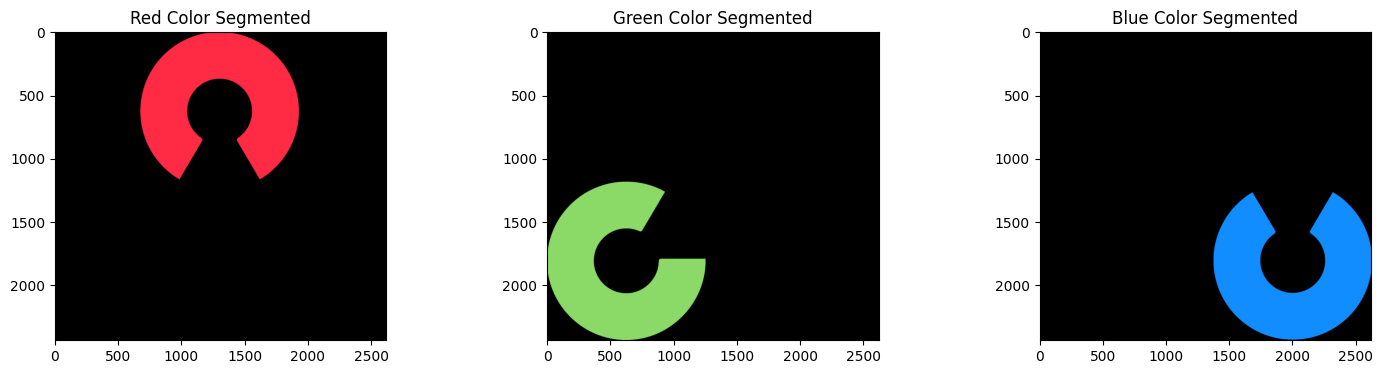

In [13]:
# Segment the colors.
r_seg = cv2.bitwise_and(img, img, mask=r_mask)
g_seg = cv2.bitwise_and(img, img, mask=g_mask)
b_seg = cv2.bitwise_and(img, img, mask=b_mask)

# Display the segmented colors.
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(r_seg[:, :, ::-1]); plt.title("Red Color Segmented")
plt.subplot(132); plt.imshow(g_seg[:, :, ::-1]); plt.title("Green Color Segmented")
plt.subplot(133); plt.imshow(b_seg[:, :, ::-1]); plt.title("Blue Color Segmented");

In [12]:
r_seg.shape

(2436, 2623, 3)

## 6. Exercise

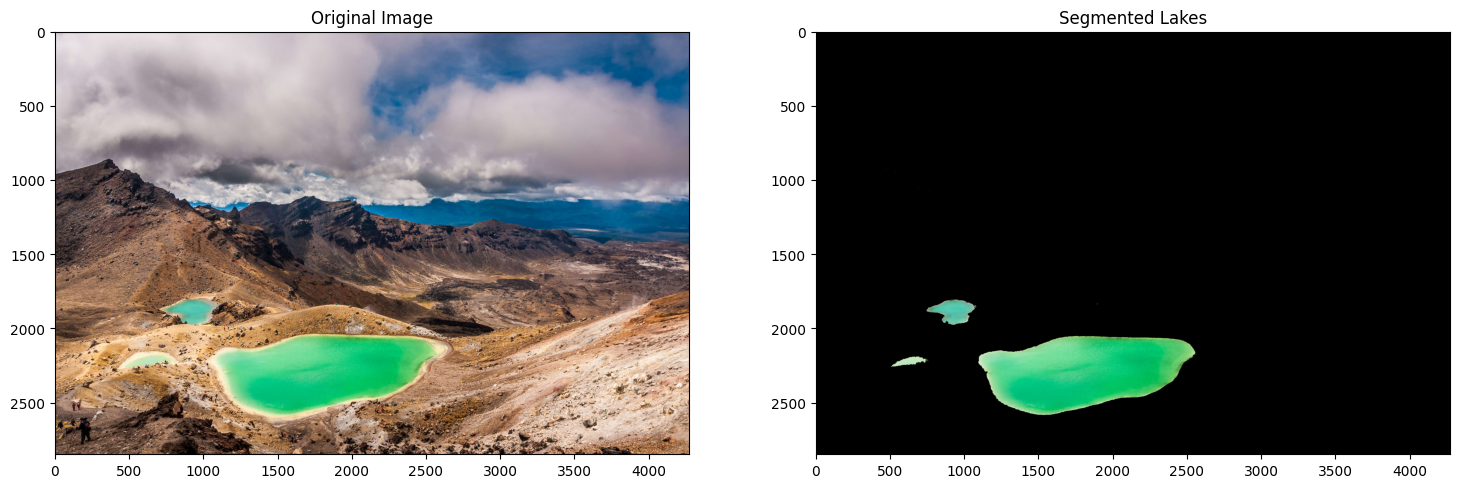

In [78]:
image = cv2.imread("../module03/Emerald_Lakes_New_Zealand.jpg", cv2.IMREAD_COLOR)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lake_lb = np.array([45, 30, 150], np.uint8)
lake_up = np.array([90, 255, 255], np.uint8)
image_hsv_lake = cv2.inRange(image_hsv, lake_lb, lake_up)

lake_segmented = cv2.bitwise_and(image, image, mask=image_hsv_lake)

# Display images.
plt.figure(figsize=(18, 6))
plt.subplot(121); plt.imshow(image[:, :, ::-1]); plt.title("Original Image");
plt.subplot(122); plt.imshow(lake_segmented[:, :, ::-1]); plt.title("Segmented Lakes");

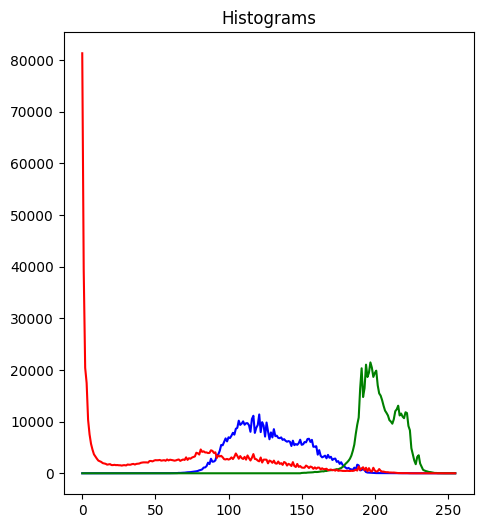

In [82]:
b = cv2.calcHist([image], [0], image_hsv_lake, [256], [0, 255])
g = cv2.calcHist([image], [1], image_hsv_lake, [256], [0, 255])
r = cv2.calcHist([image], [2], image_hsv_lake, [256], [0, 255])

plt.figure(figsize=(18, 6))
plt.subplot(131); plt.plot(b, color="blue"); plt.plot(g, color="green"); plt.plot(r, color="red"); plt.title("Histograms");